<a href="https://colab.research.google.com/github/RaedAbdelkefi/A-First-Course-in-Stochastic-Calculus/blob/main/Martingale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##1. Simulating martingales.

a)

In [ ]:
def Brownian(steps,n,tf):
  dB=np.sqrt(tf/steps)*np.random.standard_normal((steps,n))
  B0=np.zeros((1,n))
  B=np.concatenate((B0,np.cumsum(dB , axis=0)), axis=0)
  return B  

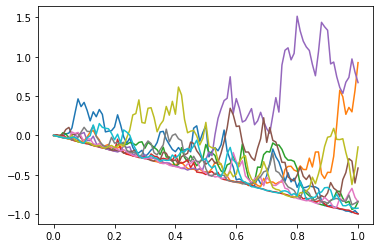

In [ ]:
B=Brownian(100,10,1)
times=np.linspace(0,1,101)
t=np.transpose(np.resize(times,(10,101)))
Y=B**2-t
plt.plot(times,Y)
plt.show()

b)

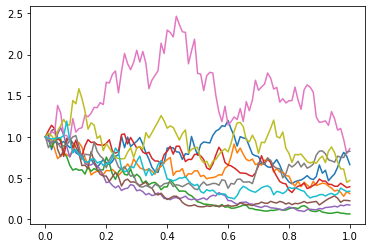

In [ ]:
S=np.exp(B-0.5*t)
plt.plot(times,S)
plt.show()

c)

In [ ]:
def Poisson(steps,n,lamda,tf):
  m=int(tf/steps)
  dP=np.random.poisson(steps, (m,n))
  P0=np.zeros((1,n))
  P=np.concatenate((P0,np.cumsum(dP , axis=0)), axis=0)
  return P  

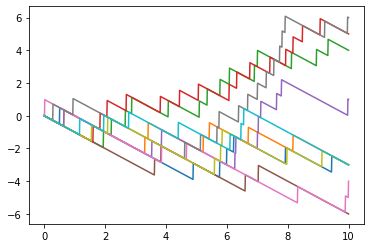

In [ ]:
P=Poisson(0.01,10,1,10)
times=np.linspace(0,10,1001)
t=np.transpose(np.resize(times,(10,1001)))
N=P-t
plt.plot(times,N)
plt.show()


##2. Maximum of Brownian motion

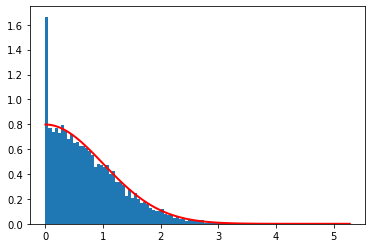

 the random variable max0≤𝑡≤𝑇 𝐵𝑡 has the same distribution as |𝐵𝑇|


In [ ]:
B=Brownian(100,10000,1)
M=np.max(B, axis=0)
count, bins, ignored=plt.hist(M,100,density=True)
plt.plot(bins,(2/np.sqrt(2*np.pi))*np.exp(-bins**2/2),linewidth=2,color='r')
plt.show()
print(' the random variable max0≤𝑡≤𝑇 𝐵𝑡 has the same distribution as |𝐵𝑇|')

##3. First passage time

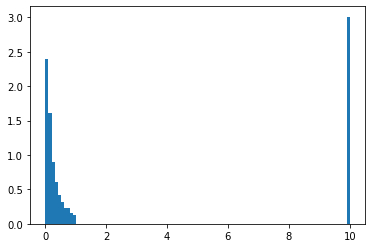

In [ ]:
B=Brownian(100,10000,10)
A=np.array(B >=1 )
tau=list()
for i in range(10000):
  for j in range(101):
    if A[j,i]==True and j<100 :
      tau.append(j*(1/100))
      break
    elif j==100:
      tau.append(10)
count, bins, ignored=plt.hist(tau,100,density=True)

In [ ]:
E=(1/10000)*sum(tau)
E

3.1842700000000157

In [ ]:
t=(1/10000)*np.sum(np.array(tau) == 10)
t

0.2908

##4. Gambler’s ruin at the French roulette

In [ ]:
def random_walk(S0,n):
  X=np.random.choice([1,-1],size=n, p=[18/38 , 20/38])
  
  S=np.concatenate((np.array([S0]), X) , axis=None)
  S=np.cumsum(S)
  S=S[1:]
  return S

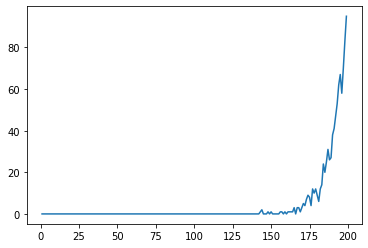

In [ ]:

l=list()
times=np.linspace(1,199,199)
for S0 in range(1,200):
  a=0
  for i in range(100):
    S=random_walk(S0,5000)
    if 200 in S :
      if 0 in S:
        if np.where(S==0)[0][0]>np.where(S==200)[0][0]:
          a+=1
      else:
        a+=1
  l.append(a)
plt.plot(times,l)
plt.show()

